### Back Propagation Implementation

#### Author: Yifan Wang
#### Reference: Andrew Ng's Deep Learning Course Notes


In [207]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_digits
import sklearn.linear_model
import matplotlib.pyplot as plt

In [208]:
# Helper Functions:
def sigmoid(x):
    return 1/(1+ np.exp(-x))


def load_data(split = 0.8):
    digits = load_digits(n_class=2)
    data = digits.data
    label = digits.target
    perm = np.random.permutation([i for i in range(data.shape[0])])
    data = data[perm,:]
    label = label[perm]
    n_split = int(data.shape[0]*split)
    X_train = data[:n_split,:]
    X_test = data[n_split:,:]
    y_train = label[:n_split].reshape((-1,1))
    y_test = label[n_split:].reshape((-1,1))
    return (X_train,y_train,X_test,y_test)


def layer_sizes(X, Y, n_hidden):
    n_x = X.shape[1] 
    n_h = n_hidden
    n_y = 1
    return (n_x, n_h, n_y)

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(0) 
    W1 = np.random.randn(n_x,n_h) * 0.01
    b1 = np.zeros(shape=(1,n_h))
    W2 = np.random.randn(n_h,n_y) * 0.01
    b2 = np.zeros(shape=(1,n_y))
    assert (W1.shape == (n_x,n_h))
    assert (b1.shape == (1,n_h))
    assert (W2.shape == (n_h,n_y))
    assert (b2.shape == (1,n_y))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


def f_propagation(X, parameters):
    # Load Pars:
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # f-prop:
    Z1 = np.dot(X,W1)+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1,W2) + b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (X.shape[0],1))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache



def cost(A2, Y):    
    m = Y.shape[0] # number of example
    #cross-entropy: -sum(  log(A2)*Y + (1-Y)*log(1-A2) ) / m
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))#cross-entropy cost
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)# dimension assurance
    assert(isinstance(cost, float))
    return cost




def b_propagation(parameters, cache, X, Y):
    m = X.shape[0]
    # Pars:
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    # Back-prop:
    dZ2= A2 - Y
#     print(dZ2.shape)
    dW2 = (1 / m) * np.dot(dZ2.T, A1)
#     print(dW2.shape)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
#     print(db2.shape)
    dZ1 = np.multiply(np.dot(dZ2,W2.T), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1.T, X)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [209]:
# Load Data:
X_train,y_train,X_test,y_test = load_data(0.75)

In [210]:
# Set NN size:
n_x, n_h, n_y = layer_sizes(X_train,y_train,5)
print((n_x, n_h, n_y))

(64, 5, 1)


In [211]:
# Initialize Parameters
parameters = initialize_parameters(n_x, n_h, n_y)

In [212]:
l_r = 0.05
costs = []
for i in range(50000):
    # Forward Propagation
    A2, cache = f_propagation(X_train, parameters)
    # Compute cost:
    if i%500==0:
        cst = cost(A2, y_train)
        print("cost = " + str(cst))
        costs.append(cst)
    # Back Prop:
    grads = b_propagation(parameters, cache, X_train, y_train)
    # Update:
    parameters['W1'] -= l_r*grads['dW1'].T
    parameters['b1'] -= l_r*grads['db1']
    parameters['W2'] -= l_r*grads['dW2'].T
    parameters['b2'] -= l_r*grads['db2']

cost = 0.6928160418254008
cost = 0.37893247665743335


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


cost = 0.2657351449667643
cost = 0.2106814021848447
cost = 0.16796790753733348
cost = 0.15655366406012863
cost = 0.12769821666456652
cost = 0.10765042038419405
cost = 0.10515273014133644
cost = 0.09369221485792743
cost = 0.0818224525674031
cost = 0.07183012070865986
cost = 0.06912047702990388
cost = 0.06833811975988302
cost = 0.06805976311355147
cost = 0.06787030919037955
cost = 0.05642953554472784
cost = 0.05492648102753574
cost = 0.05435936049544898
cost = 0.054190736348432356
cost = 0.054072192475149966
cost = 0.05398306754752965
cost = 0.05391268782805899
cost = 0.04271338630270712
cost = 0.04175774680211142
cost = 0.04099196929410778
cost = 0.0403599323648305
cost = 0.03982453599145919
cost = 0.03935470772120829
cost = 0.03904261601542163
cost = 0.038980878011736574
cost = 0.038934534710158265
cost = 0.0388983054057595
cost = 0.02797321910415808
cost = 0.022714585949979302
cost = 0.020970973296852574
cost = 0.019782752627317435
cost = 0.018745527833785858
cost = 0.0178284682435053

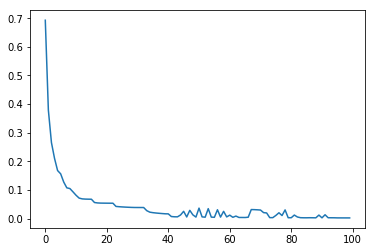

In [213]:
plt.plot(costs)